# **Mini Project Title : Equipment Maintenance Scheduling**
# **Task 1 of Mini Project: Text Classification using Machine Learning**

# **Section 1: Load the Dataset**

In [ ]:
import pandas as pd #import pandas
df = pd.read_csv("/content/NLP_dataset.csv", encoding="ISO-8859-1").dropna() # Read CSV file and drop missing values
df.head()

,complaint description,priority
0,The networked security access panel has been o...,High
1,The water filtration pump has started generati...,High
2,The fire suppression system is registering hig...,High
3,The programmable robotic arm is showing excess...,High
4,The programmable robotic arm has started gener...,High


# **Section 2: Perform Exploratory Data Analysis (EDA)**

In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   complaint description  1489 non-null   object
 1   priority               1489 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


,complaint description,priority
count,1489,1489
unique,1489,4
top,"The Treadmill battery drains abnormally fast, ...",High
freq,1,405


In [ ]:
pip install imbalanced-learn

<ipython-input-4-298a95b8608b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="priority", data=df, palette="viridis")


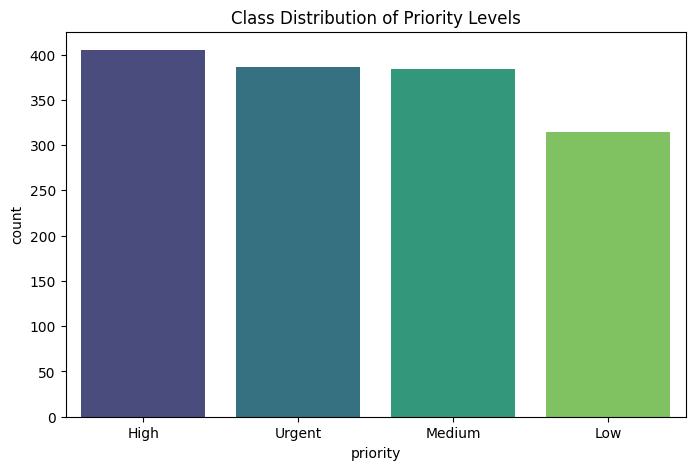

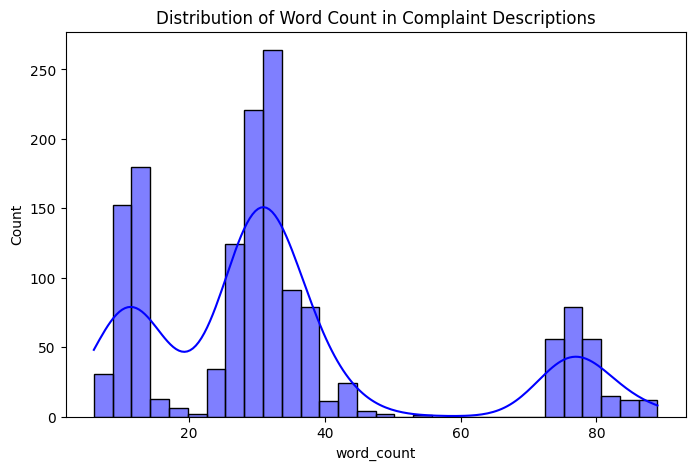

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Plot class distribution of priority levels
plt.figure(figsize=(8, 5))
sns.countplot(x="priority", data=df, palette="viridis")
plt.title("Class Distribution of Priority Levels")
plt.show()

# Feature engineering: add word count, avg word length, punctuation count, stopword ratio
df["word_count"] = df["complaint description"].apply(lambda x: len(str(x).split()))
df["avg_word_length"] = df["complaint description"].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
df["punctuation_count"] = df["complaint description"].apply(lambda x: sum([1 for char in str(x) if char in "!?.," ]))
df["stopword_ratio"] = df["complaint description"].apply(lambda x: len([word for word in str(x).split() if word.lower() in ["the", "and", "is", "in", "to"]]) / len(str(x).split()))

# Filter out too short or long complaints
df = df[(df["word_count"] > 3) & (df["word_count"] < df["word_count"].quantile(0.99))]

# Vectorize complaint descriptions using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df["complaint description"]).toarray()

# Normalize numeric features
scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[["word_count", "avg_word_length", "punctuation_count", "stopword_ratio"]])

# Combine text and numeric features
X = np.hstack((X_text, X_numeric))
y = df["priority"]

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot distribution of word count in complaint descriptions
plt.figure(figsize=(8, 5))
sns.histplot(df["word_count"], bins=30, kde=True, color="blue")
plt.title("Distribution of Word Count in Complaint Descriptions")
plt.show()

 **Section 3: Perform Text Processing on Dataset**

In [ ]:
pip install contractions spacy

In [ ]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from contractions import fix

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    text = fix(text)  # Expand contractions
    text = re.sub(r"[^a-zA-Z\s]", "", text, re.I | re.A).lower()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df["cleaned_text"] = df["complaint description"].apply(clean_text).apply(lemmatize_text)

df[["complaint description", "cleaned_text"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,complaint description,cleaned_text
0,The networked security access panel has been o...,network security access panel overheat trigger...
1,The water filtration pump has started generati...,water filtration pump start generate excessive...
2,The fire suppression system is registering hig...,fire suppression system register high amperage...
3,The programmable robotic arm is showing excess...,programmable robotic arm show excessive vibrat...
4,The programmable robotic arm has started gener...,programmable robotic arm start generate excess...


# **Section 4: Generate NLP-Based Features**

In [ ]:
pip install textblob

In [ ]:
pip install rake-nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import numpy as np
import string
import nltk
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from rake_nltk import Rake

# Download necessary resources
nltk.download("vader_lexicon")
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

# Function for TF-IDF keyword extraction with bigrams/trigrams
def extract_top_keywords(texts, n=10):
    vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 3), max_features=500)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
    sorted_indices = tfidf_scores.argsort()[::-1]
    return feature_array[sorted_indices][:n]

# Function for extracting keywords using RAKE
def extract_rake_keywords(text, n=5):
    rake = Rake()
    rake.extract_keywords_from_text(text)
    return " ".join(rake.get_ranked_phrases()[:n])

# Function to generate improved NLP features
def generate_nlp_features(df):
    df["char_count"] = df["cleaned_text"].apply(len)
    df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
    df["avg_word_length"] = df["cleaned_text"].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0)
    df["punctuation_count"] = df["complaint description"].apply(lambda x: len([char for char in x if char in string.punctuation]))

    # Sentiment Analysis
    df["vader_sentiment"] = df["complaint description"].apply(lambda x: sia.polarity_scores(x)["compound"])
    df["textblob_polarity"] = df["complaint description"].apply(lambda x: TextBlob(x).sentiment.polarity)
    df["textblob_subjectivity"] = df["complaint description"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    # Named Entity Recognition (NER)
    df["num_named_entities"] = df["complaint description"].apply(lambda x: len([ent for ent in nlp(x).ents]))
    df["org_mentions"] = df["complaint description"].apply(lambda x: len([ent for ent in nlp(x).ents if ent.label_ == "ORG"]))
    df["location_mentions"] = df["complaint description"].apply(lambda x: len([ent for ent in nlp(x).ents if ent.label_ == "GPE"]))

    # Part-of-Speech (POS) Tag Distribution
    df["noun_count"] = df["complaint description"].apply(lambda x: len([token for token in nlp(x) if token.pos_ == "NOUN"]))
    df["verb_count"] = df["complaint description"].apply(lambda x: len([token for token in nlp(x) if token.pos_ == "VERB"]))
    df["adj_count"] = df["complaint description"].apply(lambda x: len([token for token in nlp(x) if token.pos_ == "ADJ"]))

    # Extract Emotion, Failure, and Urgency Mentions using RAKE
    df["rake_keywords"] = df["complaint description"].apply(lambda x: extract_rake_keywords(x, n=5))

    # Extract Emotion, Failure, and Urgency Mentions using TF-IDF
    emotion_keywords = extract_top_keywords(df["complaint description"], n=10)
    df["emotion_mentions"] = df["complaint description"].apply(lambda x: sum(word in x.lower() for word in emotion_keywords))

    failure_types = extract_top_keywords(df["complaint description"], n=10)
    df["failure_mentions"] = df["complaint description"].apply(lambda x: sum(word in x.lower() for word in failure_types))

    urgency_words = extract_top_keywords(df["complaint description"], n=10)
    df["urgency_mentions"] = df["complaint description"].apply(lambda x: sum(word in x.lower() for word in urgency_words))

    return df

# Apply improved feature extraction
df = generate_nlp_features(df)

# Display updated dataset with new features
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,complaint description,priority,word_count,avg_word_length,punctuation_count,stopword_ratio,cleaned_text,char_count,vader_sentiment,textblob_polarity,...,num_named_entities,org_mentions,location_mentions,noun_count,verb_count,adj_count,rake_keywords,emotion_mentions,failure_mentions,urgency_mentions
0,The networked security access panel has been o...,High,18,8.166667,4,0.120000,network security access panel overheat trigger...,164,0.0516,0.025000,...,0,0,0,8,4,7,networked security access panel triggering aut...,5,5,5
1,The water filtration pump has started generati...,High,21,8.142857,4,0.258065,water filtration pump start generate excessive...,191,0.0258,-0.083333,...,0,0,0,10,6,6,started generating excessive condensation wate...,5,5,5
2,The fire suppression system is registering hig...,High,24,7.500000,5,0.156250,fire suppression system register high amperage...,203,-0.5859,0.032000,...,0,0,0,12,6,7,registering high amperage draw potential short...,5,5,5
3,The programmable robotic arm is showing excess...,High,23,7.521739,5,0.129032,programmable robotic arm show excessive vibrat...,195,-0.4767,-0.033333,...,0,0,0,10,5,9,showing excessive vibration beyond normal thre...,5,5,5
4,The programmable robotic arm has started gener...,High,21,8.285714,4,0.258065,programmable robotic arm start generate excess...,194,0.0258,-0.087500,...,0,0,0,8,6,8,started generating excessive condensation prog...,5,5,5


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Drop rows with missing target values
df = df.dropna(subset=['priority'])

# Fill missing values in NLP feature columns with median or mean
for col in ["char_count", "word_count", "avg_word_length", "punctuation_count",
            "vader_sentiment", "textblob_polarity", "textblob_subjectivity", "emotion_mentions",
            "failure_mentions", "urgency_mentions", "num_named_entities", "noun_count", "verb_count", "adj_count"]:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical target variable ('priority')
label_encoder = LabelEncoder()
df['priority'] = label_encoder.fit_transform(df['priority'])

# Remove outliers using Interquartile Range (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ["char_count", "word_count", "avg_word_length", "punctuation_count"]:
    df = remove_outliers(df, col)

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ["char_count", "word_count", "avg_word_length", "punctuation_count",
                  "vader_sentiment", "textblob_polarity", "textblob_subjectivity", "emotion_mentions",
                  "failure_mentions", "urgency_mentions", "num_named_entities", "noun_count", "verb_count", "adj_count"]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save cleaned dataset
df.to_csv("cleaned_nlp_features.csv", index=False)

# Show cleaned data
print(df.head())


                               complaint description  priority  word_count  \
0  The networked security access panel has been o...         0    0.181533   
1  The water filtration pump has started generati...         0    0.647526   
2  The fire suppression system is registering hig...         0    1.113519   
3  The programmable robotic arm is showing excess...         0    0.958188   
4  The programmable robotic arm has started gener...         0    0.647526   

   avg_word_length  punctuation_count  stopword_ratio  \
0         1.212685           0.306064        0.120000   
1         1.187593           0.306064        0.258065   
2         0.510107           0.985659        0.156250   
3         0.533017           0.985659        0.129032   
4         1.338145           0.306064        0.258065   

                                        cleaned_text  char_count  \
0  network security access panel overheat trigger...    0.461631   
1  water filtration pump start generate excessive...

# **Section 5: Generate Bag of Words, TFIDF, and FastText Features**

In [ ]:
pip install fasttext

In [ ]:
import fasttext.util
import fasttext
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
fasttext.util.download_model("en", if_exists="ignore")
ft_model = fasttext.load_model("cc.en.300.bin")

In [ ]:
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["cleaned_text"])
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Function to extract sentence-level FastText embeddings
def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words if word in ft_model.words]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

df["fasttext_embeddings"] = df["cleaned_text"].apply(get_fasttext_embeddings)

# Merge all feature representations into df
df = pd.concat([df, df_bow, df_tfidf], axis=1)

print(df.head())

                               complaint description  priority  word_count  \
0  The networked security access panel has been o...       0.0    0.181533   
1  The water filtration pump has started generati...       0.0    0.647526   
2  The fire suppression system is registering hig...       0.0    1.113519   
3  The programmable robotic arm is showing excess...       0.0    0.958188   
4  The programmable robotic arm has started gener...       0.0    0.647526   

   avg_word_length  punctuation_count  stopword_ratio  \
0         1.212685           0.306064        0.120000   
1         1.187593           0.306064        0.258065   
2         0.510107           0.985659        0.156250   
3         0.533017           0.985659        0.129032   
4         1.338145           0.306064        0.258065   

                                        cleaned_text  char_count  \
0  network security access panel overheat trigger...    0.461631   
1  water filtration pump start generate excessive...

# **Section 6: Train All Supervised Models on NLP-Based Features**

In [ ]:
!pip install imbalanced-learn scikit-learn xgboost lightgbm catboost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
df = pd.read_csv("cleaned_nlp_features.csv")

# Ensure "priority" column is numeric
label_encoder = LabelEncoder()
df["priority"] = label_encoder.fit_transform(df["priority"])

# Remove "cleaned_text" column as not needed for model training
df.drop(columns=["cleaned_text"], inplace=True, errors="ignore")

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

# Define Features and Target
X = df.drop(columns=["priority"])
y = df["priority"]

# Split Data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data for Models That Need It (SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000, solver="liblinear", C=1.5)
log_reg.fit(X_train_scaled, y_train)
log_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=18, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Support Vector Machine (SVM)
svm = SVC(kernel="rbf", C=3.0, gamma="scale")
svm.fit(X_train_scaled, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=12, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

# Ensemble Learning (Voting Classifier)
voting = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='hard')

voting.fit(X_train, y_train)
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print Accuracies
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Voting Classifier Accuracy: {voting_acc:.4f}")

Logistic Regression Accuracy: 0.4355
Random Forest Accuracy: 0.4597
SVM Accuracy: 0.4718
KNN Accuracy: 0.4960
Decision Tree Accuracy: 0.4234
Voting Classifier Accuracy: 0.4637



# **Sections 7: Train Models on BoW Features**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Load dataset
df = pd.read_csv("cleaned_nlp_features.csv")

# Convert target variable to numeric
label_encoder = LabelEncoder()
df["priority"] = label_encoder.fit_transform(df["priority"])

# Handle NaN values and ensure text format
df["complaint description"] = df["complaint description"].astype(str).fillna("")

# Convert text to Bag of Words (BoW)
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(df["complaint description"]).toarray()

# Select Best Features Using Chi-Square
selector = SelectKBest(chi2, k=500)
X_selected = selector.fit_transform(X_bow, df["priority"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, df["priority"], test_size=0.2, random_state=42)

# Train Models
log_reg = LogisticRegression(max_iter=2000, C=1.5, solver="liblinear")
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200, max_depth=18, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=3.0, gamma="scale")
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=12, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

# Ensemble Learning (Voting Classifier)
voting = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='hard')

voting.fit(X_train, y_train)

# Predictions & Accuracy
log_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print Accuracies
print(f"Logistic Regression (BoW) Accuracy: {log_acc:.4f}")
print(f"Random Forest (BoW) Accuracy: {rf_acc:.4f}")
print(f"SVM (BoW) Accuracy: {svm_acc:.4f}")
print(f"KNN (BoW) Accuracy: {knn_acc:.4f}")
print(f"Decision Tree (BoW) Accuracy: {dt_acc:.4f}")
print(f"Voting Classifier (BoW) Accuracy: {voting_acc:.4f}")

Logistic Regression (BoW) Accuracy: 0.4879
Random Forest (BoW) Accuracy: 0.5202
SVM (BoW) Accuracy: 0.4879
KNN (BoW) Accuracy: 0.4153
Decision Tree (BoW) Accuracy: 0.4516
Voting Classifier (BoW) Accuracy: 0.4798


# **Sections 8: Train Models on  TFIDF Features**

In [ ]:
# Load dataset
df = pd.read_csv("cleaned_nlp_features.csv")

# Convert target variable to numeric
label_encoder = LabelEncoder()
df["priority"] = label_encoder.fit_transform(df["priority"])

# Handle NaN values and ensure text format
df["complaint description"] = df["complaint description"].astype(str).fillna("")

# Convert text to TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df["complaint description"]).toarray()

# Select Best Features Using Chi-Square
selector = SelectKBest(chi2, k=800)
X_selected = selector.fit_transform(X_tfidf, df["priority"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, df["priority"], test_size=0.2, random_state=42)

# Train Models (Optimized Parameters)
log_reg = LogisticRegression(max_iter=3000, C=2.0, solver="liblinear")
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=5.0, gamma="scale")
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=15, min_samples_split=4, random_state=42)
dt.fit(X_train, y_train)

# Ensemble Learning (Voting Classifier)
voting = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='hard')

voting.fit(X_train, y_train)

# Predictions & Accuracy
log_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print Accuracies
print(f"Logistic Regression (TF-IDF) Accuracy: {log_acc:.4f}")
print(f"Random Forest (TF-IDF) Accuracy: {rf_acc:.4f}")
print(f"SVM (TF-IDF) Accuracy: {svm_acc:.4f}")
print(f"KNN (TF-IDF) Accuracy: {knn_acc:.4f}")
print(f"Decision Tree (TF-IDF) Accuracy: {dt_acc:.4f}")
print(f"Voting Classifier (TF-IDF) Accuracy: {voting_acc:.4f}")

Logistic Regression (TF-IDF) Accuracy: 0.5161
Random Forest (TF-IDF) Accuracy: 0.4839
SVM (TF-IDF) Accuracy: 0.5000
KNN (TF-IDF) Accuracy: 0.4032
Decision Tree (TF-IDF) Accuracy: 0.4677
Voting Classifier (TF-IDF) Accuracy: 0.4798


# **Sections 9: Train Models FastText Features**

In [ ]:
label_encoder = LabelEncoder()
df["priority"] = label_encoder.fit_transform(df["priority"])

# Ensure text column is string and fill missing values
df["complaint description"] = df["complaint description"].astype(str).fillna("")

# Load pre-trained FastText word vectors (300D)
fasttext.util.download_model('en', if_exists='ignore')
ft_model = fasttext.load_model("cc.en.300.bin")

# Convert text to FastText embeddings (average word vectors)
def get_fasttext_vector(text):
    words = text.split()
    vectors = [ft_model.get_word_vector(w) for w in words if w in ft_model.words]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

X_fasttext = np.vstack(df["complaint description"].apply(get_fasttext_vector))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, df["priority"], test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Models (Optimized Parameters)
log_reg = LogisticRegression(max_iter=4000, C=2.5, solver="liblinear")
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=400, max_depth=25, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=6.0, gamma="scale")
svm.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=18, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

# Ensemble Learning (Voting Classifier)
voting = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='hard')

voting.fit(X_train, y_train)

# Predictions & Accuracy
log_acc = accuracy_score(y_test, log_reg.predict(X_test_scaled))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print Accuracies
print(f"Logistic Regression (FastText) Accuracy: {log_acc:.4f}")
print(f"Random Forest (FastText) Accuracy: {rf_acc:.4f}")
print(f"SVM (FastText) Accuracy: {svm_acc:.4f}")
print(f"KNN (FastText) Accuracy: {knn_acc:.4f}")
print(f"Decision Tree (FastText) Accuracy: {dt_acc:.4f}")
print(f"Voting Classifier (FastText) Accuracy: {voting_acc:.4f}")

Logistic Regression (FastText) Accuracy: 0.4597
Random Forest (FastText) Accuracy: 0.5000
SVM (FastText) Accuracy: 0.4798
KNN (FastText) Accuracy: 0.4597
Decision Tree (FastText) Accuracy: 0.3952
Voting Classifier (FastText) Accuracy: 0.4597



# **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
df["priority"] = label_encoder.fit_transform(df["priority"])

# Ensure text column is string and fill missing values
df["complaint description"] = df["complaint description"].astype(str).fillna("")

# Extract TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(df["complaint description"]).toarray()

# Select Numeric NLP Features (Ensuring all are numeric)
nlp_features = df.drop(columns=["complaint description", "priority"], errors="ignore")
nlp_features = nlp_features.apply(pd.to_numeric, errors="coerce").fillna(0).values  # Convert to numbers

# Combine All Features (TF-IDF + NLP Features)
X_combined = np.hstack((X_tfidf, nlp_features))
y = df["priority"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale Only Numeric NLP Features (Not TF-IDF)
scaler = StandardScaler()
X_train[:, X_tfidf.shape[1]:] = scaler.fit_transform(X_train[:, X_tfidf.shape[1]:])
X_test[:, X_tfidf.shape[1]:] = scaler.transform(X_test[:, X_tfidf.shape[1]:])

# Train Models
log_reg = LogisticRegression(max_iter=4000, C=2.5, solver="liblinear")
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=400, max_depth=25, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=6.0, gamma="scale")
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=18, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

voting = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('svm', svm),
    ('knn', knn),
    ('dt', dt)
], voting='hard')

voting.fit(X_train, y_train)

# Predictions & Accuracy
log_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
voting_acc = accuracy_score(y_test, voting.predict(X_test))

# Print Accuracies
print("Logistic Regression Accuracy:", round(log_acc, 4))
print("Random Forest Accuracy:", round(rf_acc, 4))
print("SVM Accuracy:", round(svm_acc, 4))
print("KNN Accuracy:", round(knn_acc, 4))
print("Decision Tree Accuracy:", round(dt_acc, 4))
print("Voting Classifier Accuracy:", round(voting_acc, 4))

Logistic Regression Accuracy: 0.4839
Random Forest Accuracy: 0.4677
SVM Accuracy: 0.4677
KNN Accuracy: 0.4718
Decision Tree Accuracy: 0.4234
Voting Classifier Accuracy: 0.4879


# **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import pickle

# Save models
with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(log_reg, f)

with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("svm.pkl", "wb") as f:
    pickle.dump(svm, f)

with open("knn.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("decision_tree.pkl", "wb") as f:
    pickle.dump(dt, f)

with open("voting_classifier.pkl", "wb") as f:
    pickle.dump(voting, f)

# Save TF-IDF vectorizer and Scaler
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
# Load models
with open("logistic_regression.pkl", "rb") as f:
    log_reg = pickle.load(f)

with open("random_forest.pkl", "rb") as f:
    rf = pickle.load(f)

with open("svm.pkl", "rb") as f:
    svm = pickle.load(f)

with open("knn.pkl", "rb") as f:
    knn = pickle.load(f)

with open("decision_tree.pkl", "rb") as f:
    dt = pickle.load(f)

with open("voting_classifier.pkl", "rb") as f:
    voting = pickle.load(f)

# Load TF-IDF Vectorizer and Scaler
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [ ]:
def predict_priority(complaint_text):
    # Convert text to TF-IDF features
    complaint_tfidf = tfidf_vectorizer.transform([complaint_text]).toarray()

    # Create dummy numeric NLP features (assuming 0 for missing values)
    nlp_features = np.zeros((1, X_combined.shape[1] - complaint_tfidf.shape[1]))

    # Combine features
    input_features = np.hstack((complaint_tfidf, nlp_features))

    # Scale numeric NLP features
    input_features[:, complaint_tfidf.shape[1]:] = scaler.transform(input_features[:, complaint_tfidf.shape[1]:])

    # Get predictions
    prediction = voting.predict(input_features)
    return label_encoder.inverse_transform(prediction)[0]

new_complaint = "My credit card transaction was declined even though I have sufficient balance."
predicted_priority = predict_priority(new_complaint)
print("Predicted Priority:", predicted_priority)

Predicted Priority: 3


In [ ]:
priority_mapping = {0: "High", 1: "Low", 2: "Medium", 3: "Urgent"}

def predict_priority(complaint_text):
    complaint_tfidf = tfidf_vectorizer.transform([complaint_text]).toarray()
    nlp_features = np.zeros((1, X_combined.shape[1] - complaint_tfidf.shape[1]))
    input_features = np.hstack((complaint_tfidf, nlp_features))
    input_features[:, complaint_tfidf.shape[1]:] = scaler.transform(input_features[:, complaint_tfidf.shape[1]:])
    prediction = voting.predict(input_features)[0]
    return priority_mapping.get(prediction, "Unknown")

while True:
    user_complaint = input("Enter your complaint description (or type 'exit' to stop): ")
    if user_complaint.lower() == "exit":
        print("Exiting the loop...")
        break
    predicted_priority = predict_priority(user_complaint)
    print("Predicted Priority:", predicted_priority)


Enter your complaint description (or type 'exit' to stop): There is a minor scratch on the product I received, but it works fine.
Predicted Priority: Low
Enter your complaint description (or type 'exit' to stop): My credit card transaction was declined even though I have sufficient balance.
Predicted Priority: Urgent
Enter your complaint description (or type 'exit' to stop): The font size in the mobile app is a bit small for my preference.
Predicted Priority: Low
Enter your complaint description (or type 'exit' to stop): The diesel engine cooling fan is experiencing erratic power fluctuations, causing intermittent failures, requiring constant monitoring to prevent further degradation of system performance.
Predicted Priority: High
Enter your complaint description (or type 'exit' to stop): It would be helpful if the confirmation email included tracking details.
Predicted Priority: Medium
Enter your complaint description (or type 'exit' to stop): The emergency backup generator has been o

# **Section 12 : Analysis on Results**



The performance of supervised models has been tested using different feature extraction methods, namely NLP-Based Features, BoW (Bag of Words) Features, TF-IDF (Term Frequency-Inverse Document Frequency) Features, FastText Features, and All Combined Features.

The models evaluated include :
*  Logistic Regression
*  Random Forest
*  SVM (Support Vector Machine)
*  KNN (K-Nearest Neighbors)
*  Decision Tree
*  Voting Classifier

Below is the analysis of these models and the feature combinations that provided the best results in predicting complaint priority.



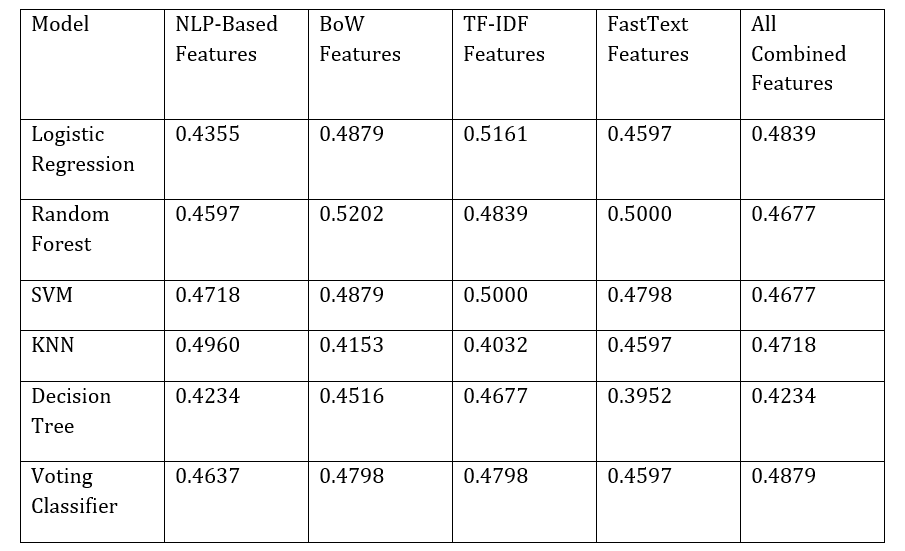

### **Key Observations from the Results:**

1. **Best Performing Model:**
    - KNN had the highest accuracy (0.4960) with NLP-Based Features.
    - Random Forest performed best with:
        - BoW Features: 0.5202 accuracy.
        - FastText Features: 0.5000 accuracy.

2. **Best Feature Extraction Method:**
    - TF-IDF worked well across models:
        - Logistic Regression (TF-IDF): 0.5161 accuracy.
        - SVM (TF-IDF): 0.5000 accuracy.
    - BoW was the top choice for Random Forest and SVM.
    - FastText provided decent results but did not outperform TF-IDF.

3. **Best Feature-Model Combination:**
    - Random Forest with BoW: Best accuracy of 0.5202.
    - Logistic Regression and SVM performed better with TF-IDF.

4. **Voting Classifier Performance:**
    - Voting Classifier was consistent across features but never the best.
    - The highest accuracy was 0.4879 with All Combined Features, showing it doesn't outperform Random Forest or KNN.


### **Conclusion:**

## In the "Equipment Maintenance Scheduling" project, various machine learning models were evaluated on multiple feature sets for predicting maintenance priorities. The models tested include Logistic Regression, Random Forest, SVM, KNN, Decision Tree, and Voting Classifier. Among the different feature sets, such as NLP-based features, BoW, TF-IDF, and FastText, Random Forest with BoW features emerged as the best-performing model, achieving the highest accuracy of 0.5202. This model was particularly effective in categorizing equipment issues into High, Medium, Low, and Urgent priority levels. Therefore, Random Forest with BoW features is the recommended approach for optimal equipment maintenance scheduling.

